In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df = pd.read_csv("./Subscription_Service_Churn_Dataset.csv")
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                702 non-null    float64
 14  SupportTic

In [ ]:
# to confirm whether churn is boolean value or not
df['Churn'].value_counts()

Churn
0    794
1    169
Name: count, dtype: int64

In [7]:
df['AccountAgeGroup'] = pd.cut(
    df['AccountAge'],
    bins=[0,6,12,24,60,df['AccountAge'].max()],
    labels=['0-6m','6-12m','1-2y','2-5y','5y+']
)


In [11]:
num_cols = [
    'MonthlyCharges','TotalCharges','UserRating'
]

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [12]:
df[num_cols]

,MonthlyCharges,TotalCharges,UserRating
0,11.321950,475.521914,3.489465
1,12.810915,1217.036887,2.251860
2,12.169888,91.583304,2.898328
3,17.917819,967.562224,1.275004
4,12.169888,339.057244,3.236230
...,...,...,...
958,5.157131,428.041874,2.200066
959,13.149346,881.006183,2.898328
960,8.575780,1020.517781,3.330466
961,15.908851,614.196606,2.898328


In [21]:
df['AccountAgeGroup']

0      2-5y
1       5y+
2      0-6m
3      2-5y
4      2-5y
       ... 
958     5y+
959     5y+
960     5y+
961    2-5y
962    2-5y
Name: AccountAgeGroup, Length: 963, dtype: category
Categories (5, object): ['0-6m' < '6-12m' < '1-2y' < '2-5y' < '5y+']

In [32]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                    0
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
AccountAgeGroup               0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   AccountAge                963 non-null    int64   
 1   MonthlyCharges            963 non-null    float64 
 2   TotalCharges              963 non-null    float64 
 3   SubscriptionType          913 non-null    object  
 4   PaymentMethod             740 non-null    object  
 5   PaperlessBilling          963 non-null    object  
 6   ContentType               963 non-null    object  
 7   MultiDeviceAccess         963 non-null    object  
 8   DeviceRegistered          887 non-null    object  
 9   ViewingHoursPerWeek       963 non-null    float64 
 10  AverageViewingDuration    963 non-null    float64 
 11  ContentDownloadsPerMonth  963 non-null    int64   
 12  GenrePreference           853 non-null    object  
 13  UserRating                963 non-null    float64 

In [29]:
df['SubscriptionType'].astype('category')

0         Basic
1      Standard
2      Standard
3         Basic
4         Basic
         ...   
958       Basic
959       Basic
960       Basic
961       Basic
962       Basic
Name: SubscriptionType, Length: 963, dtype: category
Categories (3, object): ['Basic', 'Premium', 'Standard']

In [33]:
df['SubscriptionType'] = df['SubscriptionType'].fillna('Basic')

In [34]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                    0
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
AccountAgeGroup               0
dtype: int64

In [37]:
df['PaymentMethod'].dtype

dtype('O')

In [43]:
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

In [44]:
df['PaymentMethod'].dtype

CategoricalDtype(categories=['Bank transfer', 'Credit card', 'Electronic check',
                  'Mailed check'],
, ordered=False, categories_dtype=object)

In [48]:
df['PaymentMethod'].isnull().value_counts()

PaymentMethod
False    740
True     223
Name: count, dtype: int64

In [62]:
df['ContentType'].value_counts()

ContentType
Both        349
TV Shows    311
Movies      303
Name: count, dtype: int64

<Axes: title={'center': 'Churn Count by Content Type'}, xlabel='ContentType'>

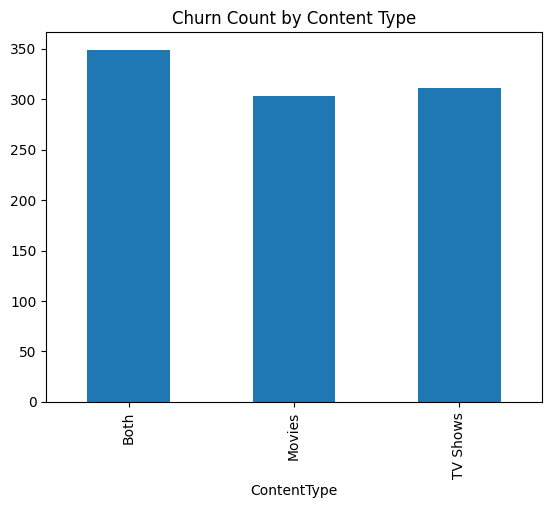

In [64]:
df.groupby('ContentType')['Churn'].count().plot(
    kind='bar',
    title='Churn Count by Content Type'
)


In [65]:
df['DeviceRegistered'].value_counts()

DeviceRegistered
Mobile      278
Computer    251
TV          251
Tablet      107
Name: count, dtype: int64

In [67]:
df['DeviceRegistered'].isnull().sum()

np.int64(76)

In [68]:
df['DeviceRegistered'].dtype

dtype('O')

<Axes: xlabel='DeviceRegistered'>

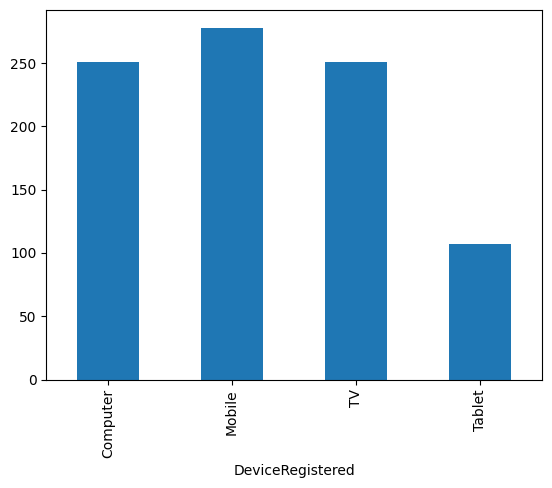

In [69]:
df.groupby('DeviceRegistered')['Churn'].count().plot(kind="bar")

In [70]:
df['DeviceRegistered'] = df['DeviceRegistered'].fillna('Not Registered')


<Axes: xlabel='DeviceRegistered'>

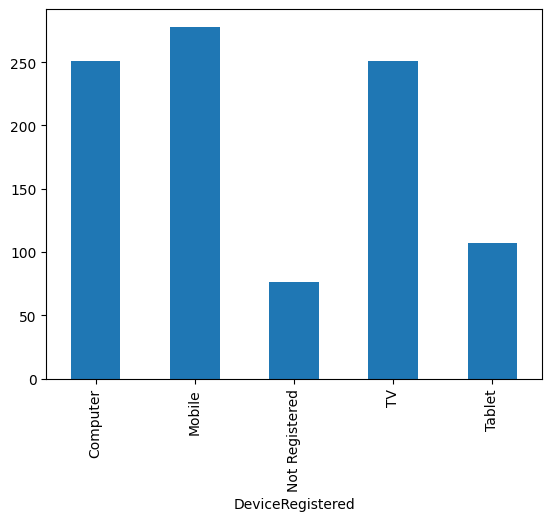

In [71]:
df.groupby('DeviceRegistered')['Churn'].count().plot(kind="bar")

In [72]:
df['DeviceRegistered'].astype('category')

0        Tablet
1        Mobile
2        Tablet
3        Mobile
4        Mobile
         ...   
958      Mobile
959    Computer
960          TV
961      Mobile
962          TV
Name: DeviceRegistered, Length: 963, dtype: category
Categories (5, object): ['Computer', 'Mobile', 'Not Registered', 'TV', 'Tablet']

In [77]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered              0
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                    0
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
AccountAgeGroup               0
dtype: int64

In [78]:
df['GenrePreference'].value_counts()

GenrePreference
Comedy     196
Fantasy    185
Drama      185
Action     178
Sci-Fi     109
Name: count, dtype: int64

In [79]:
df['GenrePreference'] = df['GenrePreference'].fillna('Others')

In [82]:
df['GenrePreference'].value_counts()

GenrePreference
Comedy     196
Fantasy    185
Drama      185
Action     178
Others     110
Sci-Fi     109
Name: count, dtype: int64

In [84]:
df['GenrePreference'].astype('category')

0       Comedy
1       Comedy
2      Fantasy
3        Drama
4       Comedy
        ...   
958     Action
959     Others
960    Fantasy
961     Sci-Fi
962     Action
Name: GenrePreference, Length: 963, dtype: category
Categories (6, object): ['Action', 'Comedy', 'Drama', 'Fantasy', 'Others', 'Sci-Fi']

<Axes: title={'center': 'Churn by Genre'}, xlabel='GenrePreference'>

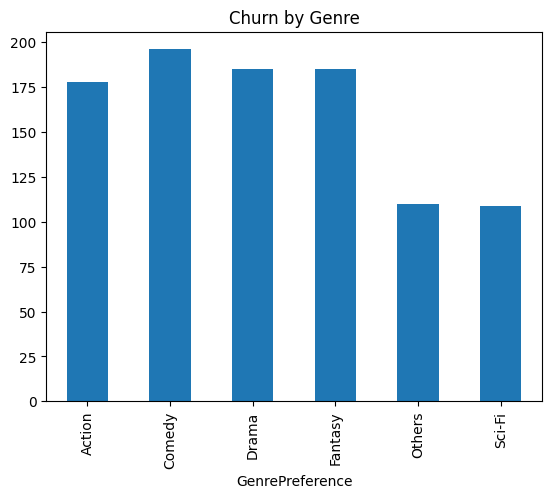

In [86]:
df.groupby('GenrePreference')['Churn'].count().plot(kind='bar', title="Churn by Genre")

In [87]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered              0
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference               0
UserRating                    0
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
AccountAgeGroup               0
dtype: int64

In [88]:
df['Gender'].value_counts()

Gender
Male      541
Female    382
Name: count, dtype: int64

In [89]:
df['Gender']

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
958      Male
959      Male
960      Male
961      Male
962      Male
Name: Gender, Length: 963, dtype: object

In [90]:
df['Gender'] = df['Gender'].fillna('Not-Specified')

In [91]:
df['Gender'].astype('category')

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
958      Male
959      Male
960      Male
961      Male
962      Male
Name: Gender, Length: 963, dtype: category
Categories (3, object): ['Female', 'Male', 'Not-Specified']

<Axes: title={'center': 'Churn by Gender'}, xlabel='Gender'>

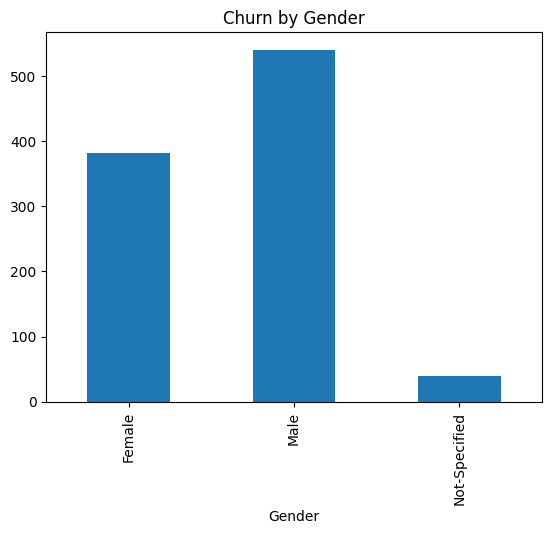

In [92]:
df.groupby('Gender')['Churn'].count().plot(kind='bar', title="Churn by Gender")

In [93]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered              0
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference               0
UserRating                    0
SupportTicketsPerMonth        0
Gender                        0
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
AccountAgeGroup               0
dtype: int64

In [ ]:
#drpping the subtitlesEnabled option 
del(df['SubtitlesEnabled'])

In [98]:
df.isnull().sum()

AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered              0
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference               0
UserRating                    0
SupportTicketsPerMonth        0
Gender                        0
WatchlistSize                 0
ParentalControl               0
CustomerID                    0
Churn                         0
AccountAgeGroup               0
dtype: int64

In [102]:
df['PaymentMethod'] =df['PaymentMethod'].astype('object')

In [103]:
df['PaymentMethod']= df['PaymentMethod'].fillna('Others')

In [104]:
df['PaymentMethod'].value_counts()

PaymentMethod
Credit card         245
Others              223
Electronic check    214
Bank transfer       214
Mailed check         67
Name: count, dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   AccountAge                963 non-null    int64   
 1   MonthlyCharges            963 non-null    float64 
 2   TotalCharges              963 non-null    float64 
 3   SubscriptionType          963 non-null    object  
 4   PaymentMethod             963 non-null    object  
 5   PaperlessBilling          963 non-null    object  
 6   ContentType               963 non-null    object  
 7   MultiDeviceAccess         963 non-null    object  
 8   DeviceRegistered          963 non-null    object  
 9   ViewingHoursPerWeek       963 non-null    float64 
 10  AverageViewingDuration    963 non-null    float64 
 11  ContentDownloadsPerMonth  963 non-null    int64   
 12  GenrePreference           963 non-null    object  
 13  UserRating                963 non-null    float64 

In [107]:
cat_cols=[
    "SubscriptionType",
    "PaymentMethod",
    "PaperlessBilling",
    "ContentType",
    "MultiDeviceAccess",
    "DeviceRegistered",
    "GenrePreference",
    "Gender"
]

df[cat_cols] = df[cat_cols].astype('category')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   AccountAge                963 non-null    int64   
 1   MonthlyCharges            963 non-null    float64 
 2   TotalCharges              963 non-null    float64 
 3   SubscriptionType          963 non-null    category
 4   PaymentMethod             963 non-null    category
 5   PaperlessBilling          963 non-null    category
 6   ContentType               963 non-null    category
 7   MultiDeviceAccess         963 non-null    category
 8   DeviceRegistered          963 non-null    category
 9   ViewingHoursPerWeek       963 non-null    float64 
 10  AverageViewingDuration    963 non-null    float64 
 11  ContentDownloadsPerMonth  963 non-null    int64   
 12  GenrePreference           963 non-null    category
 13  UserRating                963 non-null    float64 

<Axes: xlabel='AccountAgeGroup'>

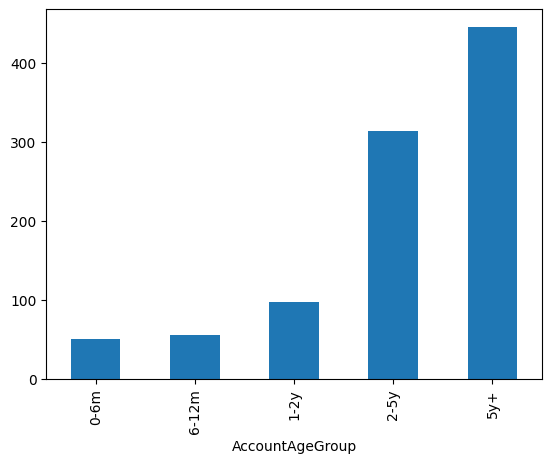

In [ ]:
df.groupby('AccountAgeGroup', observed=True)['Churn'].count().plot(kind='bar')

<Axes: xlabel='ParentalControl'>

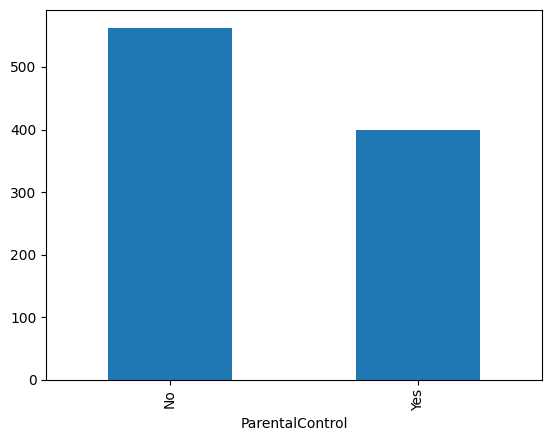

In [110]:
df.groupby('ParentalControl')['Churn'].count().plot(kind='bar')

C:\Users\rosan\AppData\Local\Temp\ipykernel_27416\3629706771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('PaperlessBilling')['Churn'].count().plot(kind='bar')


<Axes: xlabel='PaperlessBilling'>

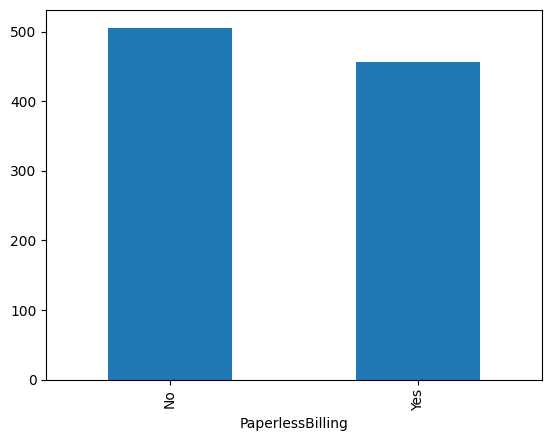

In [112]:
df.groupby('PaperlessBilling')['Churn'].count().plot(kind='bar')

<Axes: xlabel='SupportTicketsPerMonth'>

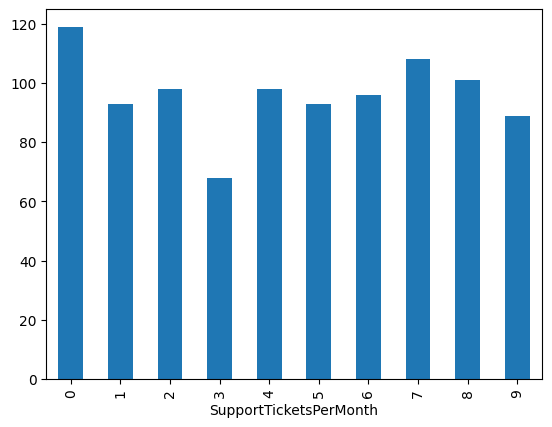

In [114]:
df.groupby('SupportTicketsPerMonth')['Churn'].count().plot(kind='bar')

In [117]:
df.to_csv("cleaned_churn_data.csv", index=False)